<a href="https://colab.research.google.com/github/vectrlab/apex-stats-modules/blob/main/z_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APEX STATS z-Scores
Module by David Schuster with code by Andy Qui Le

Licensed under CC BY-NC-SA


<img src="https://c.pxhere.com/images/c7/fe/7d715cdd48d626a66e9a0cbe616a-1585043.jpg!d" width="400">

Photo by <strong><a href="https://pxhere.com/en/photographer/767067?utm_content=clipUser&utm_medium=referral&utm_source=pxhere">mohamed_hassan</a></strong> from <strong><a href="https://pxhere.com/en/photo/1585043?utm_content=clipUser&utm_medium=referral&utm_source=pxhere">PxHere</a></strong></p>

## Part I. Start Here ##
In this module, we will see how visual representations can help us make sense out of distributions of data. 

We focus on quantitative distributions in the module, which have three properties that can be summarized. Distributions have **central tendency**, which is the value of the scores. Distributions have **spread** or **variability**, which is how different scores are from other scores in the distribution. Finally, distributions have a **shape** which becomes apaprent when they are graphed using a histogram. 

Along the way, we will show you how you can use Python to do statistics. You can work right in this notebook.

Arrows (<font color="red">➡</font>) indicate something for you to do as you work through this notebook. The first thing you should do is to save a copy.

### <font color="red">➡</font> 1. Save a Copy ###

This notebook is "view only," meaning that you can view it, but you cannot save any changes. To create your own editable copy, look towards the top of the notebook and click on `Copy to Drive`. This will cause a new tab to open with your own personal copy of the notebook. 

If you want to refer back to your copy in the future, you can find it in Google Drive in a folder called `Colab Notebooks`. Specifically, your copy of this notebook will be called: "Copy of APEX STATS Module" unless you rename it.

### <font color='red'>➡</font> 2. Change the File Name ####
* After you saved your own copy, click into the title at the top of the webpage and **delete** the words "Copy of". 
* At the end of the title **insert a hyphen "-"** and then add your **name** according to your instructor's directions. For example, Lab 3 - Frequency Distributions - Smith, Jane.
* This will make it easier for your instructor to find your work.

### <font color='red'>➡</font> 3. Change Notebook Settings ####

Change your notebook settings so your outputs get saved. Watch the 45-second video that shows you how: http://somup.com/c3Qr0sU54S 

Complete the following:

*   At the top of the webpage, click the **Notebook Settings** link. Or you can go to **EDIT** on the menu, then select "Notebook Settings".
*   **Uncheck the checkbox** for "Omit code cell output when saving this notebook". 
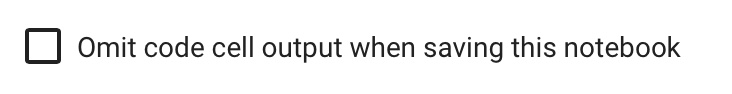
*   Click **Save**.

### <font color='red'>➡</font> 4. Share with your instructor ####

Once finished, share your completed notebook with your intructor using the *Share* button at the upper right.

### Important Tip About Working With Colab ###

Like Google Sheets, Google Colab will save as you go. If you walk away from your Colab Notebook for an extended period of time, you may need to run all your cells again in order to pick up where you left off.

---

## II. Background

The following background is recommended before starting this module:

1. **Descriptive stats in your course.** This module will work best if you have already covered distributions, histograms, and central tendency, and variability in your course. You may want to review your notes or textbook before starting this module.

2. **Welcome to Colab** If you have not worked through the <a href="https://colab.research.google.com/drive/1zTk_n6BL8Tvdhaufq_FYNXK0dbvGKnxX?usp=sharing">Welcome to Colab notebook yet</a>, you should do that first.

### Learning Outcomes

These exercises map onto several learning objective(s) for the C-ID descriptor for [Introduction to Statistics](https://c-id.net/descriptors/final/show/365). Upon successful completion of the course, you will be able to:  

* LO 1: Interpret data displayed in tables and graphically  
* LO 3: Calculate measures of central tendency and variation for a given data set
* LO 4: Identify the standard methods of obtaining data and identify advantages and disadvantages of each
* LO 7: Distinguish the difference between sample and population distributions

Next, read through the activity and follow the steps indicated by the arrows.

## III. Activity

This activity will use data on home prices in Connecticut.

Set up this activity by running the code block below. This will import the data. Reminder: to run the cell, you can either use `Shift` + `Enter`, or you can hit the play button.


### 1. Get data

Before you can begin these exercises, you need to run the code cell below, which will import the file and create a dataframe (i.e., spreadsheet) named `data`. Once you run the cell, you will see a preview of the dataframe. Take note that it contains several columns (these will be descibed in the exercise).

### <font color="red">➡</font> Run the cell ###

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

After you click it, you should see the text "The data were loaded" and a preview of the data. If you see that, continue to the next section. If you come back to this notebook later, you will need to rerun this cell to load the data again.

If you see the text "There was a problem loading the data," then the most likely explanation is a bug that is our fault. Let your instructor know the notebook is not working properly.

In [ ]:
# Setup Example Data

# import library
import pandas as pd 
# read the datafile
data = pd.read_csv("https://raw.githubusercontent.com/vectrlab/apex-stats-datasets/main/connecticut-housing/example.csv") 
# handle data loading error
try:
    data
    print("The data were loaded")
except NameError:
    print("There was a problem loading the data.")

### <font color="red">➡</font> Run the cell ###

Next, we will generate a quick preview of the data you just loaded. Run the cell that follows. To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

After you run it, you should see a table with rows and columns. The rows are numbered starting with zero, and the columns are labeled y, x, x1, and so on. 


In [ ]:
data

### 2. Explore the Data

When you imported the data in the block above, you should have seen a preview of it in this notebook. This dataset reports average home sale prices for counties in Connecticut.

- `data["y"]`: Name of the county in Connecticut    
- `data["x"]`: The median home sale price, in dollars
- `data["x1"]`: The mean home sale price, in dollars

This dataset shows us the concept of **unit of analysis**. When we collect data from individuals, people are often the unit of analysis. However, that is not always the case. To identify the unit of analysis, consider who or what is being represented by one single score. In this example, each score is from a county in Connecticut, so the county is the unit of analysis. Note that it is not people and it is not homes. Our data file does not include the sale price of individual homes. Rather, it includes the average sale prices of homes in the county.

Because we want to learn about home sales in counties in Connecticut, and all counties are represented in our data, the collection of all the scores in variable `x` forms a **population distribution**, or collection of scores from all members of our population of interest.


### <font color="red">➡</font> Paste the code and run the cell ###
To focus specifically on values in `data["x"]`, copy and paste `data["x"]` into the code cell below. **Important!** Make sure that you use lowercase x and not uppercase X, and that you include the brackets and quote marks, as well.


### 3. Z-Scores ###

Z-scores tell us about the position of a score within a distribution. Z-scores are given in standard deviation units. That is, they are a property of each score that gives the distance between the score and the mean in standard deviation units.

For example, a z-score of z = 3 is three standard deviations above the mean. A z-score of z = 0 is zero standard deviations above the mean, which is at the mean.


### 4. Convert a Raw score to a z-Score for Known Mean and SD ###

Remember that the z-score is a distance from the mean, so every score in a distribution has a corresponding z-score. And, if two scores are the same, they will have the same z-score.

To find a single z-score, we can use the formula `z = (score - mean)/sd`. Another way of saying this is that we are converting a raw score into a z-score. 

### <font color="red">➡</font> Run the cell ###

First, we need to find the mean from our population.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Population mean

# import library
import numpy as np 
# display the mean
np.mean(data["x"]) 

### <font color="red">➡</font> Run the cell ###

Next, we need to find the standard deviation from our population.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Population standard deviation

# import library
import numpy as np 
# display the population standard deviation
np.std(data["x"], ddof=0) 

With those two values, we can now use the z-score formula. For now, you'll have to copy and paste the values when prompted. Later, we will see that Python can do this more automatically.

### <font color="red">➡</font> Run the cell ###

Run the code below to find the z-score that corresponds to the raw score of $300,000. Do not enter dollar signs or commas. Instead, enter 300000. You will need to enter the mean and standard deviation you found in the prior two cells.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Apply the z-score formula to user inputs
# z = (score - mean)/pop_sd

# ask user to insert a new score
raw = float(input("Score = ")) 
# ask user to insert the mean
mean = float(input("Mean = ")) 
# ask user to insert the standard deviation
sd = float(input("Input the standard deviation: "))
# find z-score with formula, round to 2 decimal places
z = round((raw - mean)/sd, 2) 
# print result
print(f"z = {z}")

### <font color="red">➡</font> Answer the following questions ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q1. What is the z-score for $310,000? Was it higher or lower than the z-score for $300,000?

* 



-Q2. Run the prior cell once more and find $300,000 again. Did the value change? So long as you are using the same standard deviation and mean, will you ever get a different value for the same raw score of $300,000?

* 




-Q3. Within the same distribution, how many z-scores correspond to each raw score?

* 



### 5. Convert a z-Score to Raw score for a Known Mean and SD ###

We can also convert z-scores into raw scores if we know the population mean and standard deviation. 

### <font color="red">➡</font> Run the cell ###

Try converting the z-score you just calculated for $300,000 back into a raw score. If successful, the code will display a single number.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.


In [ ]:
# Apply the raw score formula to user inputs
# raw = score * sd + mean

# ask user to insert the z-score
z = float(input("z = ")) 
# ask user to insert the mean
mean = float(input("Mean = ")) 
# ask user to insert the standard deviation
sd = float(input("Input the standard deviation: ")) 
# find raw score with formula, round to 2 decimal places
raw = round(z * sd + mean, 2) 
# print result
print(f"score = {raw}") 

### <font color="red">➡</font> Answer the following questions ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q4. How many standard deviations away from the mean is the value 300,000?

* 



-Q5. What is the z-score for 100,000?

* 




-Q6. What does it mean for a z-score to be negative?

* 




### 6. Standardizing a Distribution ###

Often, we want to convert an entire distribution of raw scores to z-scores. The name for this process is called **standardizing**. Standardizing a distribution will alter its mean and standard deviation (it will have a mean of 0 and a standard deviation of 1), but it does not change its shape.

To demonstrate, we will create a new variable, `data["z"]` to hold the z-scores corresponding to all of the median home prices.

### <font color="red">➡</font> Run the cell ###

Run the next cell to create a new variable, `data["z"]`, which will hold the z-scores corresponding to all of the median home prices.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Generate Z-scores

# import library
from scipy import stats
# find z-scores and save them into a new column
data["z"] = stats.zscore(data["x"])
# display z-scores
data["z"]

### <font color="red">➡</font> Run the cell ###

Next, generate a histogram of the z-scores. Notice how the mean and standard deviation has changed but the shape has not.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Histogram with custom binning and custom color: Z-Scores
# color names that work should include 
# https://matplotlib.org/stable/gallery/color/named_colors.html

# import library
import seaborn as sns 
# get user input for color
custom_color = input("Type the name of a color : ")
# get user input for bins
custom_binwidth = int(input("Enter the width of the bins : "))
# display the histogram
sns.histplot(data["z"], color = custom_color, binwidth = custom_binwidth) 

### 7. Converting a Distribution from z-Scores into Raw Scores ###



### <font color="red">➡</font> Run the cell ###

So that you have a complete set of z-score tools, note that we can convert a standardized distribution into raw scores, as well. Notice that the output is now back to the original distribution.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Generate Raw Scores

# import library
from scipy import stats
# below is a list of raw scores
raw_scores = [] 
# display the population standard deviation
sd = np.std(data["x"], ddof=0) 
# find the mean of variable x
mean = data["x"].mean()
# convert from z-scores
for z in data["z"]: 
    # Save each raw score into list
    raw_scores.append(z * sd + mean)  
# display raw scores  
raw_scores

### 8. Using z-scores to Detect Outliers ###

We noticed earlier that the distribution of median home prices is positively skewed. The appearance of a tail on the right side of the distribution says that the home prices in some counties are much higher than most others. We call extreme, low-frequency scores **outliers**, and they can occur on either the positive side or negative side of the distribution. 

Because z-scores tell us the number of standard deviations away from the mean, they are useful for detecting outliers in a distribution.


### <font color="red">➡</font> Run the cell ###

We can use our z-score distribution to see if any scores are above 3. z = 3 is a common cutoff used to identify outliers. While we are at it, we should look for z-scores on the other side of the distribution, those below z = - 3.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Selecting cases in a dataframe

# Look for z-scores above 3
data[data["z"] > 3] 

### <font color="red">➡</font> Fix the code and run the cell ###

The code you ran finds outliers on the positive side, with z-scores greater than 3. It is also possible for outliers to exist on the negative side, with z-scores less than -3. Modify the cell below so that it finds scores less than (&lt;) -3.

To run the cell, click on it, and then you can either simultaneously hit `Shift` + `Enter`, or you can click the play button to the left of the cell.

In [ ]:
# Selecting cases in a dataframe

# Edit this line to look for z-scores below -3
data[data["z"] > 3] 

### 9. Deciding to Keep or Exclude an Outlier from your Data ###

You may get advice to remove or exclude an outlier score from your data. Be careful with this. Just because a score is an outlier does not mean it does not belong in the data. In our example, some counties have higher median home prices. If we exclude the highest ones, we will have a distribution that is more normal at a cost of discarding information. In this case, we will **bias** our estimates of home prices if we exclude the highest scores. Sometimes outliers are legitimate scores that belong in our data, even if they create messy distribution shapes. When outliers are the result of an error (like a typo), then such errors should be removed. In all, we want to avoid biasing our distributions while also looking for and fixing errors.

### <font color="red">➡</font> Answer the following question ###

Text like this is also in a cell. Double click right here to edit this text cell. Then, type your answers to each question below the question. When finished, press `Shift` + `Enter` and you will see your answers in the notebook.

-Q7. If your neighbor said their house just sold for a price that made them an outlier, what would that mean?

* 



----
## IV. Summary

- In this module, we worked with population distributions, especially ones that were close to normal. 
- Our research data is more often done on sample data instead of population data, so we need a few more tools to work with samples.
- Z-scores tell us the distance from the mean in standard deviation units, and every score has a corresponding z-score.
- We can convert single scores into z-scores or **standardize** an entire distribution into z-scores.


---
## V. All done, congrats! 

Today you've not only learned about describing data, but you've also learned how to write some Python code. High five!

<img src="https://live.staticflickr.com/3471/3904325807_8ab0190152_b.jpg" alt="High-five!" width="100"/>

["High-five!"](https://live.staticflickr.com/3471/3904325807_8ab0190152_b.jpg) by Nick J Webb is licensed under CC BY 2.0